# Lab Demo COMP7035 Week 9

## Lab Demo COMP7035 Week 9
### 1. Be famililar with Skikit-learn 
### 2. Using Scikit-learn for supervised learning 
### 3. Using Scikit-learn for unsupervised learning 

## Exercise 1: Basics

### Problem 1: Data manipulation: from Pandas to Scikit-learn
#### Task 1.1: Using Pandas.read_csv to input the data from an 000_example.csv file, where the column label "Group" is taken as the label and column labels "F1", "F2" and "F3" are taken as the data features. 
#### Task 1.2: Binary classification using BernoulliNB from sklearn.naive_bayes, outputting both classified results with probabilities.

In [2]:
import pandas as pd

# Task 1.1 Write your code to input the data from the file "000_example.csv"
data = pd.read_csv("000_example.csv")
features = data[["F1", "F2", "F3"]]
label = data["Group"]

# Task 1.2 Using BernoulliNB to do pattern classification
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(features, label)
predicted_labels = classifier.predict(features)
predicted_probabilities = classifier.predict_proba(features)

# Output the prediction results
results = pd.DataFrame({"Features": features.values.tolist(),
                       "Label": label,
                       "Predicted Label": predicted_labels,
                       "Probability": predicted_probabilities.max(axis=1)})
print(results)

    Features  Label  Predicted Label  Probability
0  [1, 1, 1]      1                1     0.860585
1  [0, 1, 0]      0                0     0.721604
2  [0, 0, 0]      1                0     0.633431
3  [0, 0, 0]      0                0     0.633431
4  [0, 1, 0]      0                0     0.721604
5  [0, 1, 1]      1                1     0.755287
6  [0, 0, 1]      1                1     0.822368


### Problem 2: Principal Component Analysis (PCA)
#### Task 2.1: Using Pandas.read_csv to input the data file "007_PCA.csv", the results are stored in a Pandas format. We use the values of the column labels ["Sales_Tablets","Sales_Mobile_Phone","Sales_TVs","Sales_Radios"] to compose the features. 
#### Task 2.2 Using PCA to transform a high dimensional data into 2-dimensional ones. 
#### Task 2.3 Using scatter in the mathplotlib library to plot a 2-D figure, where 1st and 2nd dimensions separately refer to the X and Y axises. 

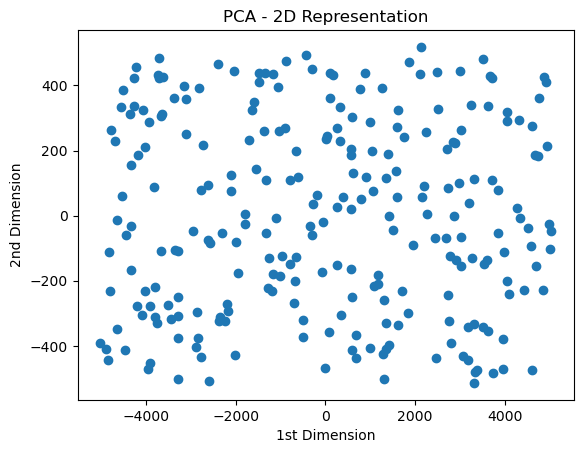

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

# Task 2.1 Write your codes here to input the CSV file
data = pd.read_csv("007_PCA.csv")
features = data[["Sales_Tablets", "Sales_Mobile_Phone", "Sales_TVs", "Sales_Radios"]]

# Task 2.2 Write your codes for the PCA Transformation 
pca = PCA(n_components=2)
transformed_features = pca.fit_transform(features)

# Task 2.3 Write your codes to plot the results
plt.scatter(transformed_features[:, 0], transformed_features[:, 1])
plt.xlabel("1st Dimension")
plt.ylabel("2nd Dimension")
plt.title("PCA - 2D Representation")
plt.show()

### Problem 3: K-Means 
#### Task 3.1 Using Pandas.read_csv to input the data file "002_customer_website.csv", and employ the column labels "Time_Website_minutes" and "Purchases_in_$" as the data features. 
#### Task 3.2 Using the data to fit a K-means classifier and output the clustering results 

In [4]:
pip install threadpoolctl==3.1.0

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn import datasets
import numpy as np
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Task 3.1 Write your codes to read the data file '002_customer_website.csv'
data = pd.read_csv("002_customer_website.csv")
features = data[["Time_Website_minutes", "Purchases_in_$"]]

# Task 3.2 Fitting the K-Means for clustering 
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
cluster_labels = kmeans.labels_
print(cluster_labels)

#siho = metrics.silhouette_samples(data,ds.labels_)

#print(siho<-0.5)
#print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(data, ds.labels_))

c:\Users\Tom Siu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Tom Siu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0 1 2 1 1 2 1 2 2 1 1 0 1 1 1 2 0 1 2 0 1 0 0 1 0 1 2 1 2 1 1 1 2 1 1 1 0
 0 1 2 0 2 1 2 1 2 2 1 1 1 2 1 0 1 1 0 2 1 1 1 2 2 1 0 1 2 0 0 1 1 1 1 0 1
 2 0 1 1 1 1 1 1 0 2 0 1 1 0 1 1 0 1 2 1 1 1 1 2 2 0 1 0 1 1 1 1 1 1 1 1 0
 1 1 0 0 0 1 2 1 1 0 0 0 2 0 0 1 2 1 2 1 0 2 0 1 2 1 1 2 1 1 0 2 1 2 2 1 1
 1 2 1 0 1 2 1 0 2 1 0 2 2 2 1 2 2 2 1 1 0 0 0 1 0 1 0 2 1 1 0 1 1 1 2 1 1
 2 1 1 1 0 1 2 2 1 0 1 0 1 0 0 1 2 0 1 2 1 1 0 1 1 1 1 0 0 2 0 1 1 0 1 0 0
 1 2 2 1 0 1 1 1 1 0 2 0 2 1 1 2 1 2 2 1 1 2 2 2 0 2 1 1 1 2 0 2 0 2 1 1 1
 1 1 1 0 0 0 2 1 2 0 1 2 2 2 2 1 1 0 1 1 0 2 0 1 1 0 0 2 1 0 1 2 2 1 0 1 1
 1 0 1 1]


### Problem 4: Gaussian Mixture Model
#### Given the make_blobs dataset, your task is to build a Gaussian Mixture Model for pattern classification.

c:\Users\Tom Siu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


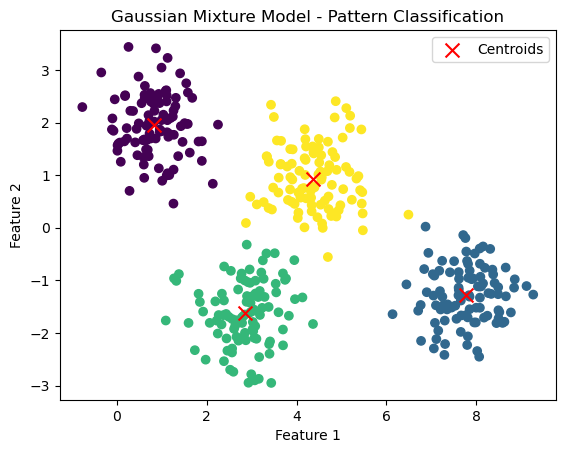

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import mixture

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

## Write your codes to build a GMM for pattern classification
gmm = mixture.GaussianMixture(n_components=4)
gmm.fit(X)

y_pred = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('Gaussian Mixture Model - Pattern Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

means = gmm.means_
plt.scatter(means[:, 0], means[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.legend()

plt.show()

#print("prediction results:")
#print(labels)
#plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

## Problem 5: Support Vector Machines (SVM)
### Read the data file "001_customer.csv" and get the feature and label information
### Task 5.1 Train a SVM model for classifying the data 
### Task 5.2 Train a linear SVM model with a L1-norm regularization (Lassio)

In [17]:
import numpy
import pandas 
from sklearn import preprocessing
from sklearn.svm import SVC, LinearSVC

df = pandas.read_csv("001_customer.csv", index_col=False, header=0)
Group = df["Group"].values
print(Group.shape)
Features = df[["F1", "F2", "F3", "F4", "F5"]].values
Features = preprocessing.scale(Features)

# Task 5.1: Write your code to train a SVM model using SVC 
svm = SVC()
svm.fit(Features, Group)

accuracy = svm.score(Features, Group)
print("Accuracy of SVM:", accuracy)

#predictions = clf.predict(Features)
#print("The classification accuracy of SVM is {}".format(numpy.sum(predictions==Group) / Group.shape[0]))

# Task 5.2: Write your code to train a linear SVM model with a L1-norm regularizaiton
svm_l1 = LinearSVC(penalty='l1', dual=False)
svm_l1.fit(Features, Group)

accuracy = svm_l1.score(Features, Group)
print("Accuracy of linear SVM L1:", accuracy)
#print("The classification accuracy of linear SVM is {}".format(numpy.sum(predictions==Group) / Group.shape[0]))


(1000,)
Accuracy of SVM: 0.945
Accuracy of linear SVC L1: 0.857


### Problem 6: Decision Tree 
#### Building a Decision Tree to classify the Iris dataset. The maximum depths of tree is 3.

In [18]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Data preparation
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target

X = iris_df.drop(['species'], axis = 1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Write your codes to build a decision tree and evaluate its performance 
dt_classifier = DecisionTreeClassifier(max_depth=3)
dt_classifier.fit(X_train, y_train)

predictions = dt_classifier.predict(X_test)

print("The classification accuracy of the decision tree is {}".format(np.sum(predictions == y_test) / y_test.shape[0]))
#print("The classification accuracy of decision tree is {}".format(np.sum(predictions==y_test) / y_test.shape[0]))

(120, 4) (30, 4) (120,) (30,)
The classification accuracy of the decision tree is 0.9333333333333333


### Problem 7: Multi-layer Perceptron
#### Given the IRIS dataset, your task is to build an MLP classifier (with two hidden layers [75, 75]) for pattern classification.

In [21]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Data preparation
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target

X = iris_df.drop(['species'], axis = 1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

## Write your codes to build an MLP 

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp_classifier = MLPClassifier(hidden_layer_sizes=(75, 75))
mlp_classifier.fit(X_train, y_train)

predictions = mlp_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("The classification accuracy of the MLP is {}".format(accuracy))

#print("The classification accuracy of MLP is {}".format(np.sum(predictions==y_test) / y_test.shape[0]))

(120, 4) (30, 4) (120,) (30,)
The classification accuracy of the MLP is 1.0


c:\Users\Tom Siu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Problem 8: Detecting Spam in Real SMS Kaggle Data (1)
#### Reading a real SMS Kaggle datafile "spam.csv"
#### Building a Multinomial Bayes model (MultinomialNB) for the pattern classification

In [22]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import pandas as pd


def create_index(variable):
    variable = variable.upper()
    sms[variable] = sms["v2"].str.upper().str.count(variable)
    return

def count_digits(x):   
    return sum(c.isdigit() for c in x)

sms = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
create_index("FREE")
create_index("WINNER")
create_index("REMINDER")
create_index("CONTRACT")
create_index("MOBILE")
create_index("URGENT")
create_index("IMPORTANT")
create_index("PRIVATE")
create_index("CALL")
create_index("SEX")
create_index("GUARANTEED")
create_index("CONGRATS")
create_index("DATING")
create_index("CASH")
create_index("CUSTOMER")
create_index("SMS")
create_index("ACCOUNT")
create_index("HEY")
create_index("AWARDED")
create_index("WON")
create_index("CHOSEN")
create_index("WOULD")
create_index("WIND")
create_index("HORNY")
create_index("INVITING")
create_index("CHOSEN")
create_index("SHOPPING")
create_index("ENTITLED")
create_index("WANT")
create_index("ENTRY")
create_index("SECRET")
create_index("DISCOUNT")
create_index("MESSAGE")
create_index("IMPORTANT")
create_index("XXX")
create_index("GIRLS")
create_index("CONTACT")


sms["spam"]     = sms["v1"]=="spam"
sms["spam"]     = sms["spam"].astype(int)
sms["exc_mark"] = sms["v2"].str.upper().str.count("!")
sms["digits"]   = sms["v2"].apply(lambda x: count_digits(x))


data = sms[["FREE","WINNER","REMINDER","CONTRACT","MOBILE","URGENT","IMPORTANT","PRIVATE","CALL","SEX","GUARANTEED",
            "CONGRATS","DATING","CASH","CUSTOMER","SMS","ACCOUNT","HEY","AWARDED","WON","CHOSEN","WOULD",
            "WIND","HORNY","INVITING","CHOSEN","SHOPPING","ENTITLED","WANT","ENTRY","SECRET","DISCOUNT",
            "MESSAGE","IMPORTANT","exc_mark","XXX","GIRLS","CONTACT","digits"]].values.reshape(5572,39)

## Write your codes to build a Multinomial model for pattern classification
clf = MultinomialNB()
clf.fit(data, sms["spam"].values)

scores = cross_val_score(clf, data, sms["spam"].values, cv=15)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#scores = cross_val_score(clf, data, sms["spam"].values, cv=15)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.96 (+/- 0.02)


### Problem 9: Detecting Spam in Real SMS Kaggle Data (2)
#### Reading a real SMS Kaggle datafile "spam.csv"
#### Building a Multi-layer Perceptron (MLP) (with two hidden layers [75, 75]) for the pattern classification

In [23]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd


def create_index(variable):
    variable = variable.upper()
    sms[variable] = sms["v2"].str.upper().str.count(variable)
    return

def count_digits(x):   
    return sum(c.isdigit() for c in x)

sms = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
create_index("FREE")
create_index("WINNER")
create_index("REMINDER")
create_index("CONTRACT")
create_index("MOBILE")
create_index("URGENT")
create_index("IMPORTANT")
create_index("PRIVATE")
create_index("CALL")
create_index("SEX")
create_index("GUARANTEED")
create_index("CONGRATS")
create_index("DATING")
create_index("CASH")
create_index("CUSTOMER")
create_index("SMS")
create_index("ACCOUNT")
create_index("HEY")
create_index("AWARDED")
create_index("WON")
create_index("CHOSEN")
create_index("WOULD")
create_index("WIND")
create_index("HORNY")
create_index("INVITING")
create_index("CHOSEN")
create_index("SHOPPING")
create_index("ENTITLED")
create_index("WANT")
create_index("ENTRY")
create_index("SECRET")
create_index("DISCOUNT")
create_index("MESSAGE")
create_index("IMPORTANT")
create_index("XXX")
create_index("GIRLS")
create_index("CONTACT")


sms["spam"]     = sms["v1"]=="spam"
sms["spam"]     = sms["spam"].astype(int)
sms["exc_mark"] = sms["v2"].str.upper().str.count("!")
sms["digits"]   = sms["v2"].apply(lambda x: count_digits(x))


data = sms[["FREE","WINNER","REMINDER","CONTRACT","MOBILE","URGENT","IMPORTANT","PRIVATE","CALL","SEX","GUARANTEED",
            "CONGRATS","DATING","CASH","CUSTOMER","SMS","ACCOUNT","HEY","AWARDED","WON","CHOSEN","WOULD",
            "WIND","HORNY","INVITING","CHOSEN","SHOPPING","ENTITLED","WANT","ENTRY","SECRET","DISCOUNT",
            "MESSAGE","IMPORTANT","exc_mark","XXX","GIRLS","CONTACT","digits"]].values.reshape(5572,39)

## Write your codes to build an MLP for pattern classification
clf = MLPClassifier(hidden_layer_sizes=(75, 75))
clf.fit(data, sms["spam"].values)

scores = cross_val_score(clf, data, sms["spam"].values, cv=15)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

#scores = cross_val_score(model, data, sms["spam"].values, cv=15)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.01)


## Exercise 2:Predicting the Direction of Market Movements Using Linear OLS Regression

#### This section applies linear OLS regression to predict the direction of market movements based on historial log returns. To keep things simple, we are only concerned with two features: the first feature (lag_1) represents the log returns of the financial time series lagged by one day; The second (lag_2) lags the log returns by two days. Log returns- in contrast to prices-are stationary in general, which often is a necessary condition for the application of statistical and ML algorithms. 

### Part I: The Data

#### First, the importing the preparation of the data set "tr_eikon_eod_data.csv"

In [24]:
import pandas as pd 

raw = pd.read_csv("tr_eikon_eod_data.csv", index_col=0, parse_dates=True).dropna()

In [26]:
# Looking at the column labels
print(raw.columns)



Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')


In [27]:
data = pd.DataFrame(raw['EUR='])

In [28]:
data['returns'] = np.log(data / data.shift(1))

In [29]:
data.dropna(inplace=True)

In [30]:
data['direction'] = np.sign(data['returns']).astype(int)

In [32]:
data.head()

,EUR=,returns,direction
Date,,,
2010-01-05,1.4368,-0.002988,-1
2010-01-06,1.4412,0.003058,1
2010-01-07,1.4318,-0.006544,-1
2010-01-08,1.4412,0.006544,1
2010-01-11,1.4513,0.006984,1


<Axes: >

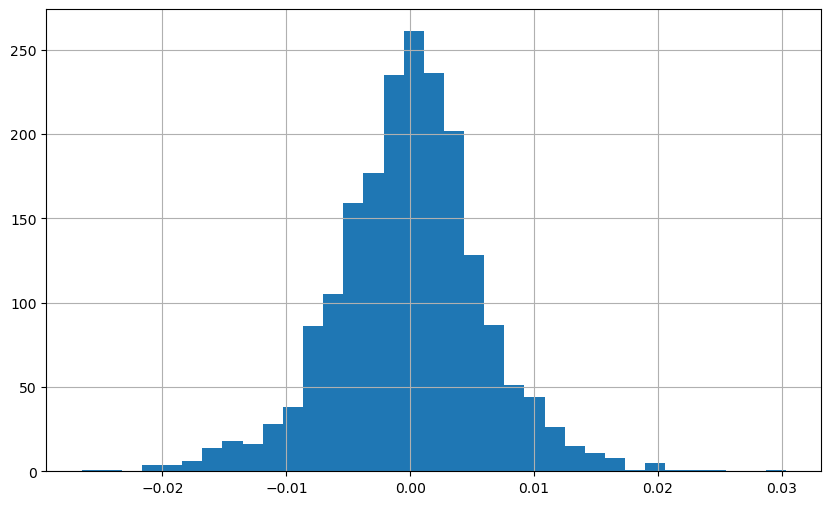

In [33]:
data['returns'].hist(bins=35, figsize=(10, 6))

In [34]:
# Create a lagging function
lags = 2
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [35]:
create_lags(data)

In [36]:
data.head()

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-05,1.4368,-0.002988,-1,NaN,NaN
2010-01-06,1.4412,0.003058,1,-0.002988,NaN
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544


In [37]:
data.dropna(inplace=True)

In [38]:
data.head()

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544
2010-01-13,1.4510,0.001103,1,-0.001310,0.006984


<Axes: xlabel='lag_1', ylabel='lag_2'>

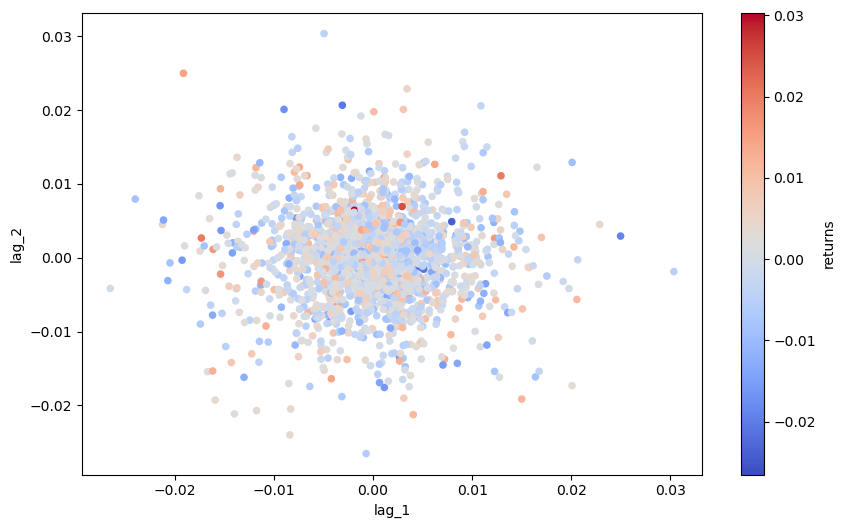

In [39]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns',
                 cmap='coolwarm', figsize=(10, 6), colorbar=True)

### Part II: Building an OLS Regression operator

#### With the dataset completed, the Linear OLS regression can be applied to learn about any potential (linear) relationships, to predict market movement based on the features, and to backtest a trading strategy based on the predictions. Two basic approaches are available: using the log returns or only the direction data as the dependent variable during the regression. In any case, predictions are real-valued and therefore transformed to either +1 or -1 to only work with the direction of the prediction:

In [40]:
from sklearn.linear_model import LinearRegression

# X represents the input data, and Y is the target one
X = data[cols]
Y_return = data['returns']
Y_direction = data['direction']

#### The linear OLS regression implementation from scikit-learn is used, where the regression models of 'pos_ols_1' and 'pos_ols_2' separately correspond to the featuers of Log-returns and Directions. 

In [43]:
model_return =  LinearRegression()
model_direction = LinearRegression()

# Write your code to fit the OLS linear regression models based on the features of Y_return and Y_direction, respectively

model_return.fit(data[cols], data['returns'])
model_direction.fit(data[cols], data['direction'])

# Write your code to predict 

data['pos_ols_1'] = model_return.predict(X)
data['pos_ols_2'] = model_direction.predict(X)
data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2010-01-07,-0.000202,-0.004063
2010-01-08,0.000046,0.043384
2010-01-11,-0.000310,-0.019115
2010-01-12,-0.000143,-0.042655
2010-01-13,0.000007,0.005976


#### Only maintain the samples with two positive results

In [44]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)

In [45]:
data['pos_ols_1'].value_counts()

-1    1605
 1     364
Name: pos_ols_1, dtype: int64

In [46]:
data['pos_ols_2'].value_counts()

 1    1231
-1     738
Name: pos_ols_2, dtype: int64

### Part III: Backtesting

#### Equipped with the directional prediction, vectorized backtesting can be applied to judge the performance of the resulting trading strategies. At this stage, the analysis is based on a number of simplifying assumptions, such as "zero transaction costs" and the usage of the same dataset for both training and testing. Under these assumptions, however, both regression-based strategies outperform the benchmark passive investment, while only the strategy trained on the direction of the market shows a positive overall performance.

In [47]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        0.807938
strat_ols_1    1.345052
strat_ols_2    1.418594
dtype: float64

#### The real-valued predictions are transformed to directional values (+1, -1). The two approaches yield different directional predictions in general, but both lead to a relatively large number of trades over time.

In [48]:
(data['direction'] == data['pos_ols_1']).value_counts()

True     989
False    980
dtype: int64

In [49]:
(data['direction'] == data['pos_ols_2']).value_counts() 

True     1023
False     946
dtype: int64

#### Shows the number of correct and false predictions by the strategies

<Axes: xlabel='Date'>

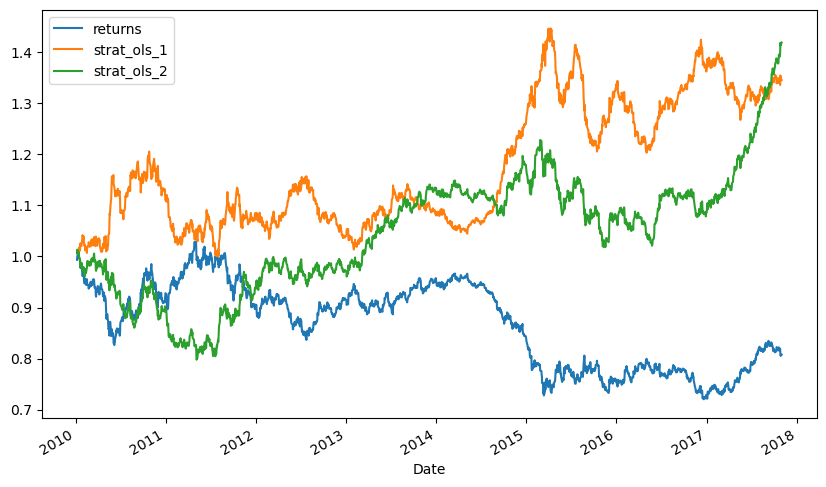

In [50]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10, 6))